#**Lending Club Case Study**

##Problem statement
###In this case study we are provided with the data of customers who has taken loan from the firm. A lot of features regarding the customer and other aspects are provided as a dataset. The dataset is about the past customers, so it included the information whether the customer has completed his payment, or still paying, or defaulted in the loan payment. Our objective is to find what all features/variables are relevant in deciding whether a future applicant is likely to default, so that we can give the information about a future applicant to the investors.

In [96]:
# Checking the python version

!python --version

Python 3.7.13


In [97]:
# importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Checking the library versions

In [98]:
# Version of pandas library

!pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.7/dist-packages
Requires: pytz, python-dateutil, numpy
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc3, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fbprophet, fastai, cufflinks, cmdstanpy, arviz, altair


In [99]:
# Version of matplotlib library

!pip show matplotlib

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: python-dateutil, numpy, pyparsing, kiwisolver, cycler
Required-by: yellowbrick, seaborn, scikit-image, pycocotools, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fbprophet, fastai, descartes, daft, arviz


In [100]:
# Version of seaborn library

!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, scipy, pandas, matplotlib
Required-by: missingno


In [101]:
# Mounting google drive to load the dataset which is uploaded in the drive

# from google.colab import drive
# drive.mount('/content/drive')
# !ls "/content/drive/MyDrive/Lending club case study/"
# loanfile_location = "/content/drive/MyDrive/Lending club case study/loan.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data_Dictionary.xlsx  loan.csv


In [102]:
# reading the dataset to a pandas dataframe
# replace the <location of the dataset> with the original location of dataset in the running system

loanfile_location = "<location of the dataset>"
loan_df = pd.read_csv(loanfile_location)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#1. Data understanding

In [103]:
loan_df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [104]:
loan_df.shape

(39717, 111)

###The dataset has 111 columns in total. Some of the columns have Null values in all the records. We should drop them.

In [105]:
#Dropping null value columns

loan_df = loan_df.dropna(axis=1, how="all", thresh=None, subset=None, inplace=False)

In [106]:
loan_df.shape

(39717, 57)

In [107]:
# Dropping columns with single and Null values

loan_df.drop(columns = loan_df.columns[loan_df.nunique()==1], inplace=True)

In [108]:
loan_df.shape

(39717, 48)

In [109]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

#2. Data cleaning

In [110]:
# Finding the columns with null values

loan_df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

###As the customer behavious variables are unavailable before loan lending, they can be excluded. So can other variables which can be identified after the loan decision.

In [111]:
# Varibales after excluding the unnecessary ones

important_vars = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies']

In [112]:
loan_df = loan_df[important_vars]

In [113]:
loan_df.shape

(39717, 17)

In [114]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

In [115]:
# Finding the columns with null values

loan_df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

### Finding the percentage of misisng vlaue rows

In [116]:
(loan_df.isna().sum()/loan_df.shape[0])*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

In [117]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

###As we do not know whether the users with 'Currrent' loan status are going to be defaulted or not, we exclude those datapoints from the dataset.

In [118]:
# Dropping the rows with current paying loan status

loan_df = loan_df[loan_df['loan_status'] != 'Current']

In [119]:
loan_df.shape

(38577, 17)

In [120]:
# Finding null value percentage

(loan_df.isna().sum()/loan_df.shape[0])*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

### Treating the emp_length who are <1 year as 1 year 1 and 10+ years as 10 years 

In [121]:
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [122]:
loan_df[loan_df['emp_length'] == '10+ years']['emp_length'] = '10 years'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [124]:
loan_df['emp_length'] = loan_df['emp_length'].replace(['10+ years'],'10 years')

In [125]:
loan_df['emp_length'].value_counts()

10 years    8488
< 1 year    4508
2 years     4291
3 years     4012
4 years     3342
5 years     3194
1 year      3169
6 years     2168
7 years     1711
8 years     1435
9 years     1226
Name: emp_length, dtype: int64

In [126]:
loan_df['emp_length'] = loan_df['emp_length'].replace(['< 1 year'],'1 year')

In [127]:
loan_df['emp_length'].value_counts()

10 years    8488
1 year      7677
2 years     4291
3 years     4012
4 years     3342
5 years     3194
6 years     2168
7 years     1711
8 years     1435
9 years     1226
Name: emp_length, dtype: int64

In [128]:
# Stripping words 'year' and 'years' from emp_length
loan_df['emp_length']=loan_df['emp_length'].str.rstrip(' year')
loan_df['emp_length']=loan_df['emp_length'].str.rstrip(' years')

loan_df['emp_length'] = pd.to_numeric(loan_df['emp_length'])

In [129]:
loan_df['emp_length'].value_counts()

10.0    8488
1.0     7677
2.0     4291
3.0     4012
4.0     3342
5.0     3194
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

###Filling the null values for 'pub_rec_bankruptcies' as '0' assuming that the null value users do not have any bankruptcies.

In [130]:
loan_df['pub_rec_bankruptcies'].fillna(value=0, inplace=True)

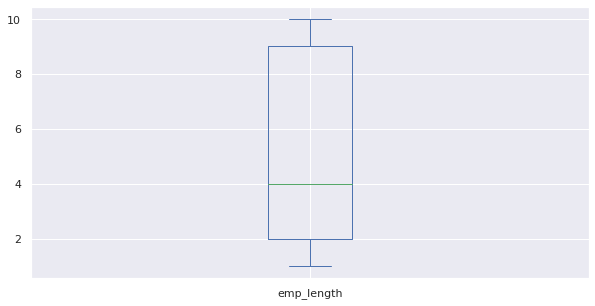

In [131]:
# Checking outliers for 'emp_length'

loan_df['emp_length'].plot.box()

In [132]:
loan_df['emp_length'].describe()

count    37544.000000
mean         5.061048
std          3.401750
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

###Filling the null values of 'emp_length' with the mean value. Since there are no outliers in 'emp_length', we are using mean instead of median.

In [133]:
mean_emp_length = loan_df['emp_length'].mean()
loan_df['emp_length'].fillna(value=round(mean_emp_length), inplace=True)
loan_df['emp_length'].describe()

count    38577.000000
mean         5.059414
std          3.355909
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [134]:
# Verifying any more null values in the dataset

loan_df.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

In [135]:
# Typecasting the column 'emp_length' as int

loan_df['emp_length'] = loan_df['emp_length'].astype('int')

In [136]:
loan_df['emp_length'].value_counts()

10    8488
1     7677
2     4291
5     4227
3     4012
4     3342
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [137]:
# Stripping the '%' character at the end of values in 'int_rate' column

loan_df['int_rate']=loan_df['int_rate'].str.rstrip('%')
loan_df['int_rate']=pd.to_numeric(loan_df['int_rate'])

In [138]:
loan_df['int_rate'].dtype

dtype('float64')

### identifying categorical and numerical columns

In [139]:
df_columns = list(loan_df.columns)
df_columns

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'dti',
 'pub_rec_bankruptcies']

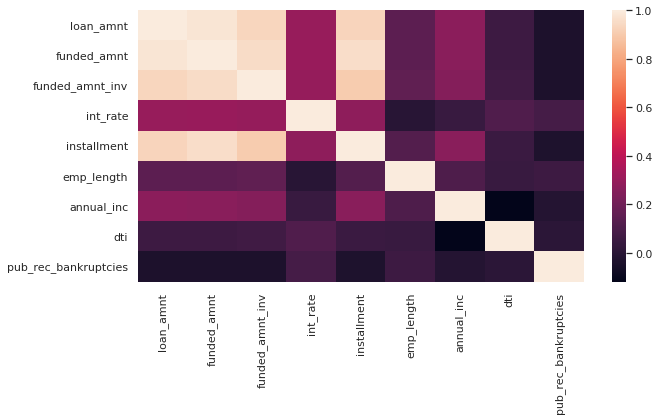

In [140]:
# Correlation plotting of features

ax = sns.heatmap(loan_df.corr())

### Since 'loan_amnt', 'funded_amnt' and 'funded_amnt_inv' are highly correlated we are considering 'funded_amnt'. In the 'funded_amnt_inv' column there are zero values for which the loan_status column shows either paid or charged off. So we are not taking that column among the three.

In [141]:
# Seperating the columns as categorical and numerical columns

cat_cols=['term', 'grade', 'sub_grade','home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']
num_cols=['funded_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'pub_rec_bankruptcies']

#3. Data analysis

##Univariate analysis

In [142]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

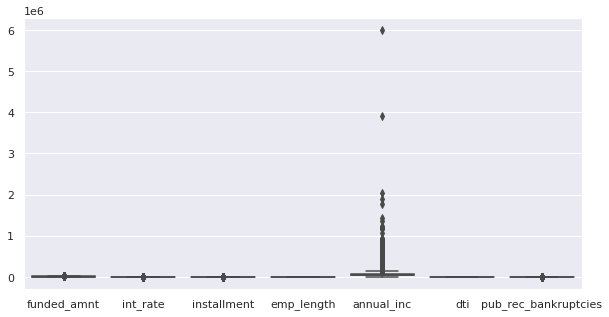

In [143]:
# Boxplot to analyse all the numerical columns at a high level

sns.boxplot(data=loan_df[num_cols])

#### We can see that the 'annual_inc' variable has a lot of outliers

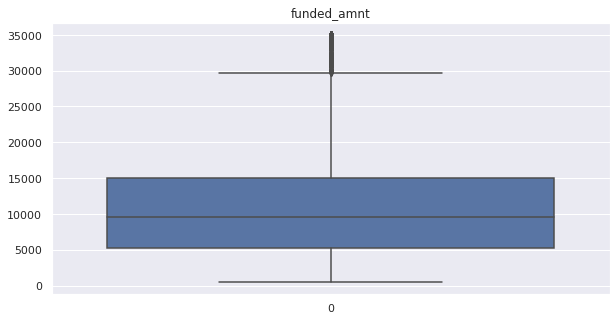

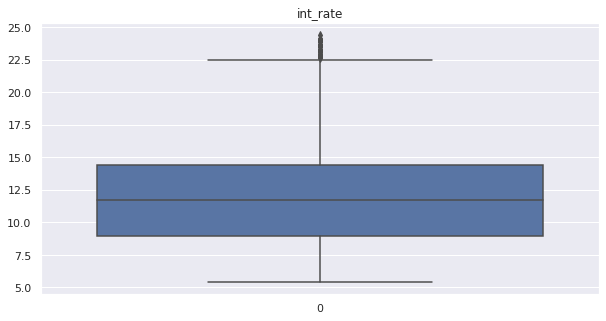

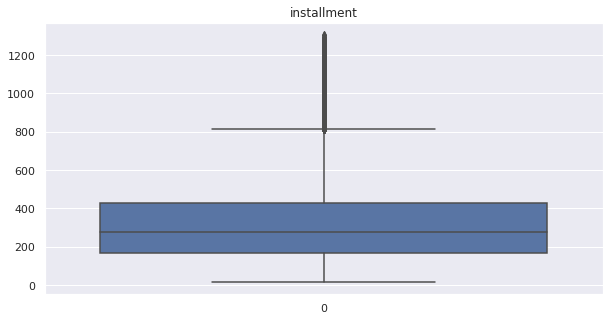

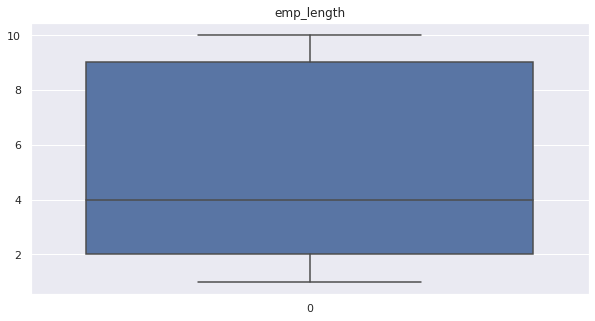

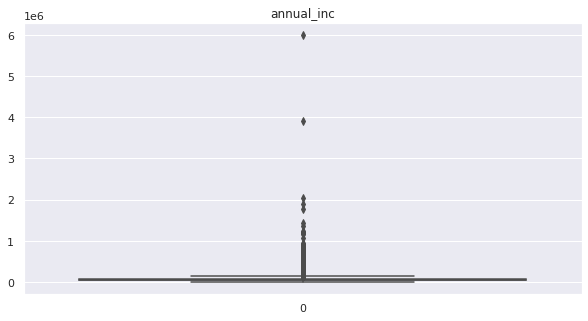

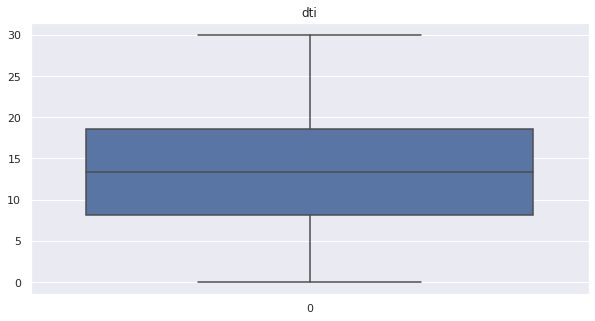

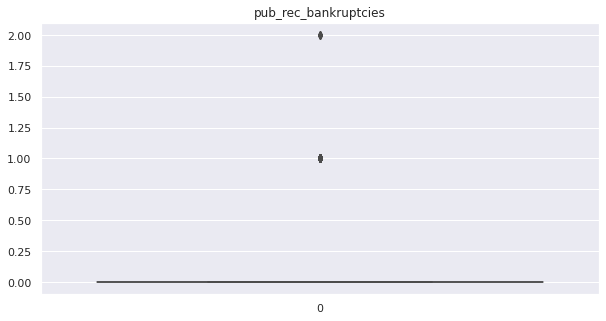

In [144]:
# Plotting boxplot for all numerical variables

for col_name in num_cols:
    sns.boxplot(data=loan_df[col_name]).set_title(col_name)
    plt.show()
    print("\n")

##Outlier treatment

###Since the variable 'annual_inc' has a lot of outliers we are considering the values below the 95th percentile.

Text(0.5, 1.0, 'annual_inc')

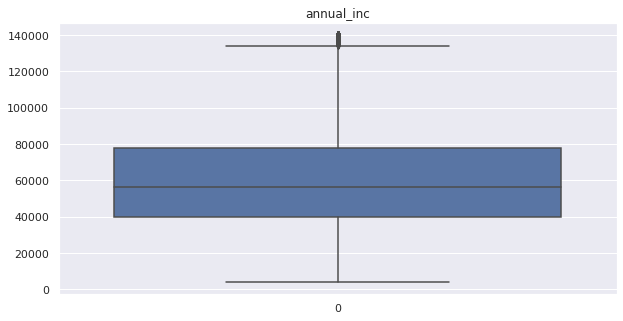

In [145]:
_95perc_ann_inc = loan_df['annual_inc'].quantile(0.95)
sns.boxplot(data=loan_df[loan_df['annual_inc'] < _95perc_ann_inc]['annual_inc']).set_title('annual_inc')

In [146]:
loan_df[loan_df['annual_inc'] >= _95perc_ann_inc]['loan_status'].value_counts()

Fully Paid     1724
Charged Off     211
Name: loan_status, dtype: int64

In [147]:
loan_df = loan_df[loan_df['annual_inc']< _95perc_ann_inc]

In [148]:
loan_df.shape

(36642, 17)

In [149]:
# From the boxplot of 'int_rate' we see the upper whisker at '22.5' Treating the datapoints above them as outliers

loan_df[(loan_df['int_rate']>22.5)]['loan_status'].value_counts()
loan_df = loan_df[(loan_df['int_rate']<=22.5)]

In [150]:
# Index resetting

loan_df = loan_df.reset_index(drop=True)

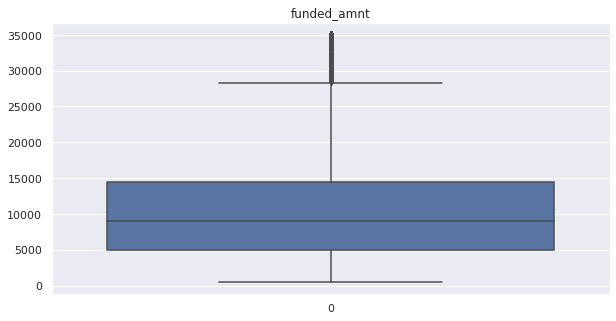

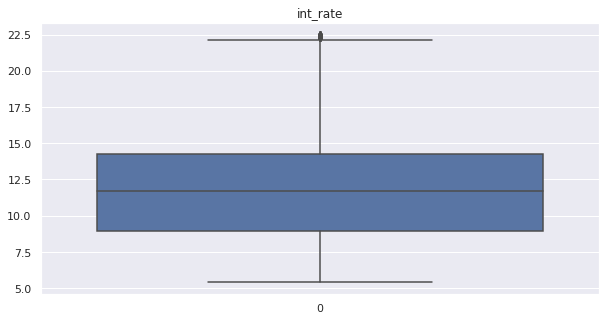

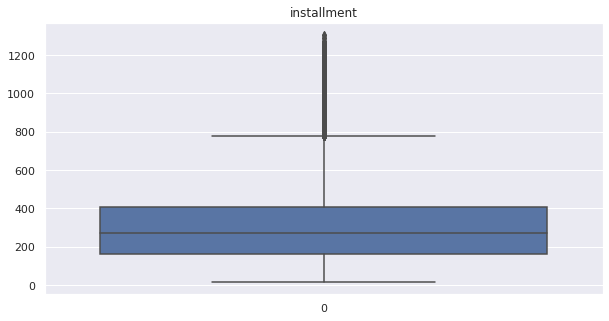

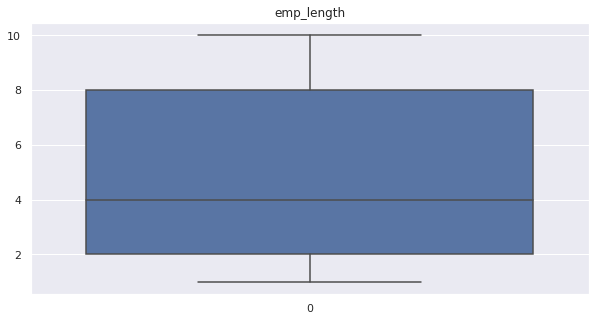

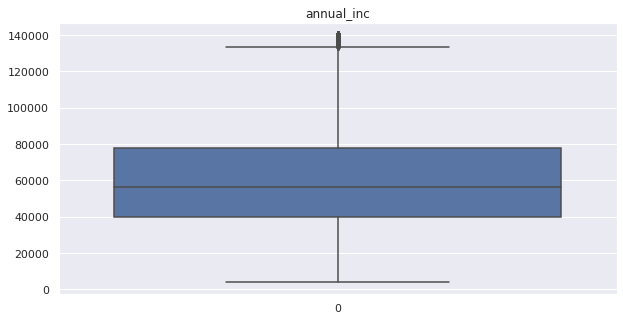

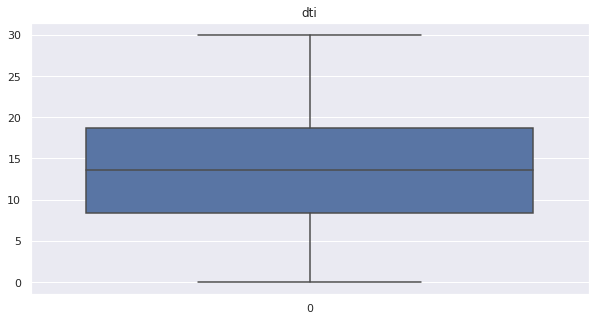

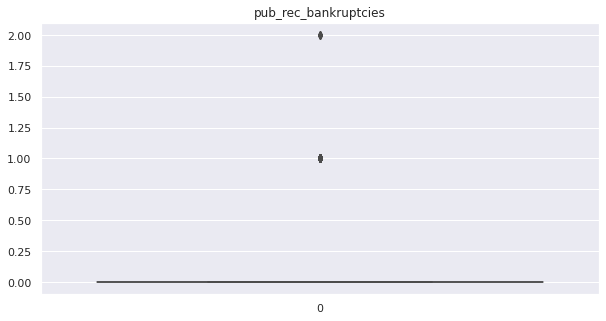

In [151]:
# Plotting all numerical features boxplot after cleaning and outlier treatment

for col_name in num_cols:
    sns.boxplot(data=loan_df[col_name]).set_title(col_name)
    plt.show()
    print("\n")

###Next we consider the categorical features

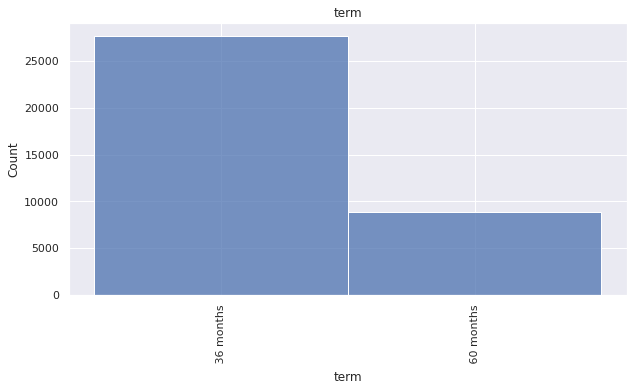

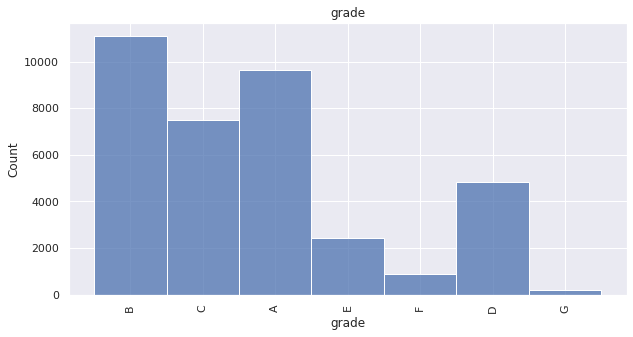

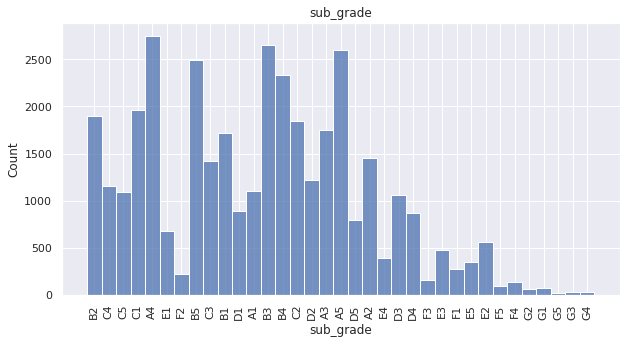

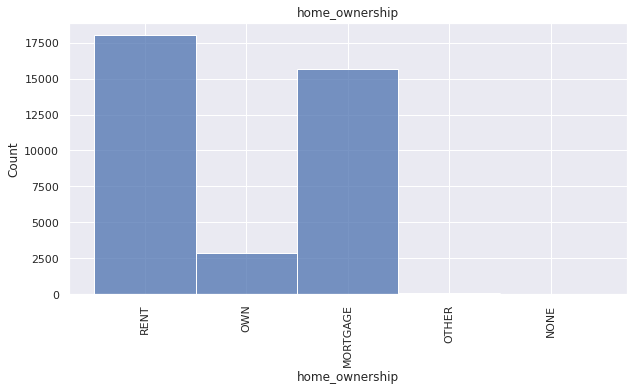

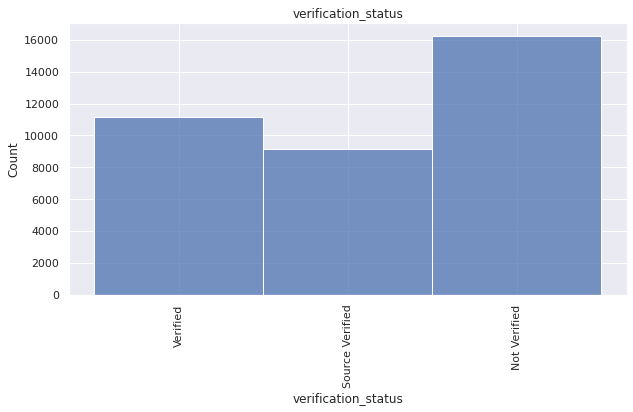

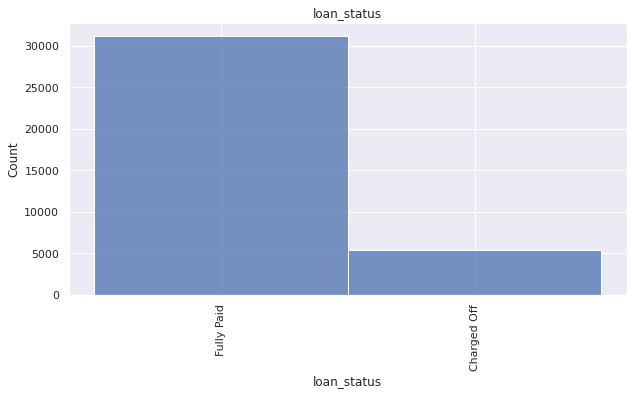

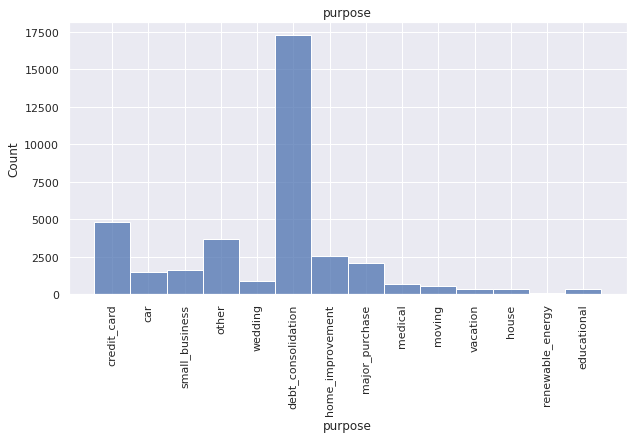

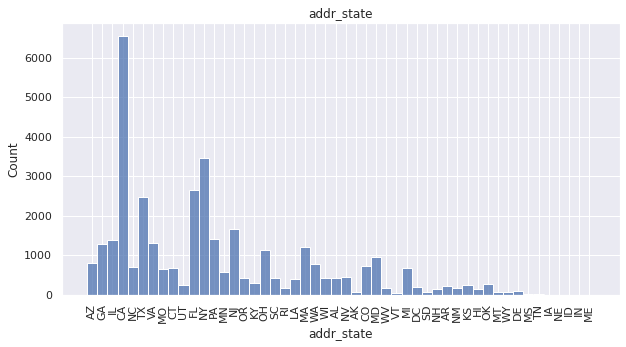

In [152]:
# Plotting histograms for categorical varibales

for col_name in cat_cols:
    sns.histplot(data = loan_df[col_name]).set_title(col_name)
    plt.xticks(rotation=90)
    plt.show()
    print("\n")

###Univariate Analysis Results
###1. The data distribution structure of loans among each variable is analysed 
###2. Annual income had a lot of outliers and they have been treated
###3. The customers from each category are analysed and their distribution among each values is identified. For example, we understood that the customers are majorly from the state 'CA'.

##Segmented univariate analysis

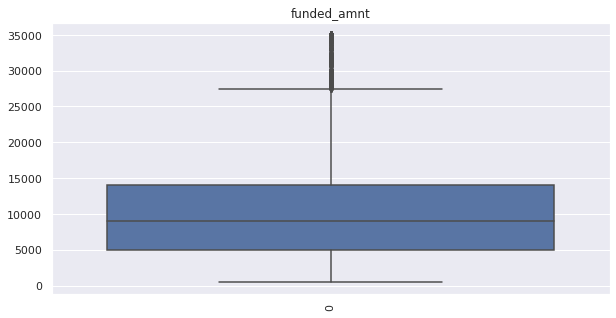

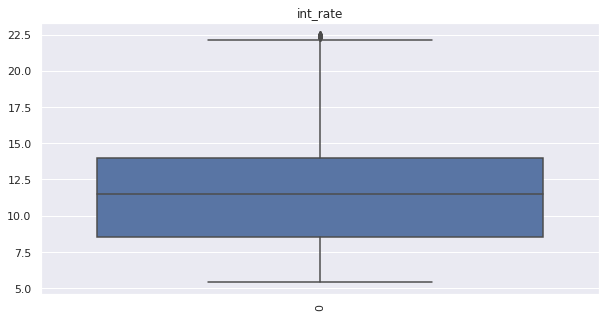

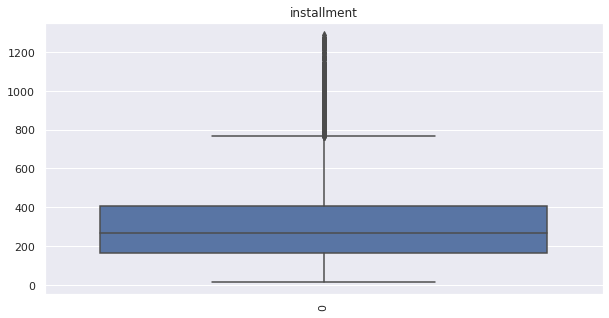

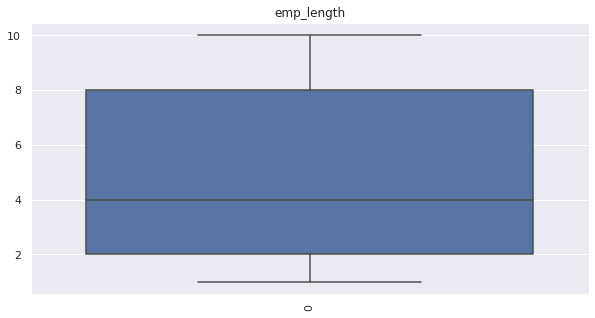

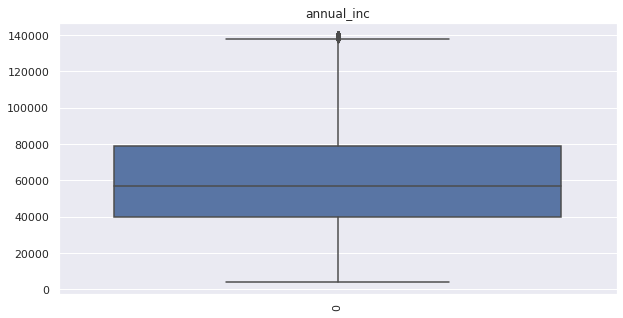

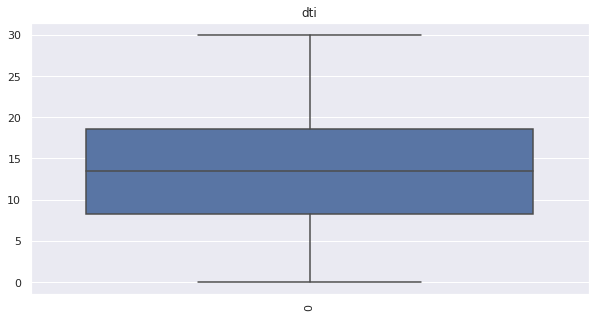

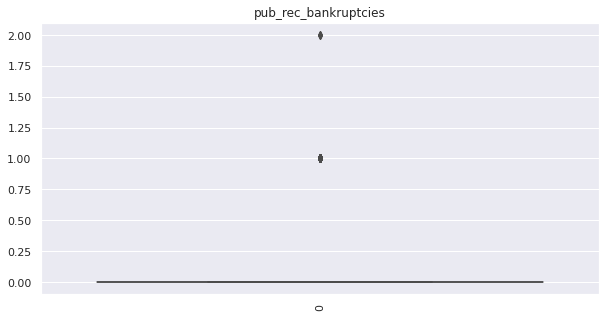

In [153]:
for col_name in num_cols:
    sns.boxplot(data = loan_df[loan_df['loan_status']=='Fully Paid'][col_name]).set_title(col_name)
    plt.xticks(rotation=90)
    plt.show()
    print("\n")

In [154]:
loan_df['loan_status'].value_counts()

Fully Paid     31199
Charged Off     5389
Name: loan_status, dtype: int64

In [155]:
print (loan_df[loan_df['loan_status']=='Charged Off'].index.tolist())
print (loan_df[loan_df['loan_status']=='Charged Off'].index)
print(loan_df.index)
#loan_df = loan_df[loan_df['loan_status']=='Charged Off'].reset_index(drop=True)
loan_df = loan_df.reset_index(drop=True)

[1, 7, 8, 11, 13, 20, 23, 25, 26, 43, 47, 50, 52, 61, 63, 65, 68, 90, 92, 96, 105, 111, 112, 115, 122, 128, 136, 142, 144, 146, 159, 165, 166, 167, 169, 172, 173, 176, 183, 191, 192, 200, 206, 209, 210, 211, 215, 223, 234, 238, 248, 252, 255, 260, 279, 280, 281, 284, 293, 294, 297, 298, 303, 305, 311, 312, 316, 320, 328, 333, 336, 346, 350, 351, 358, 381, 383, 390, 392, 398, 400, 402, 423, 427, 429, 431, 441, 445, 449, 452, 457, 466, 474, 483, 486, 492, 494, 497, 499, 500, 505, 506, 518, 519, 522, 525, 526, 530, 536, 537, 539, 543, 544, 548, 552, 554, 564, 567, 569, 570, 577, 581, 587, 593, 599, 629, 632, 633, 638, 640, 660, 663, 665, 670, 680, 683, 687, 695, 700, 708, 711, 712, 723, 724, 726, 732, 738, 740, 749, 753, 757, 761, 763, 785, 792, 798, 802, 818, 819, 820, 823, 825, 834, 838, 842, 844, 852, 856, 859, 865, 871, 873, 877, 881, 885, 906, 912, 923, 927, 933, 942, 944, 955, 969, 972, 978, 982, 985, 988, 989, 996, 1002, 1003, 1005, 1007, 1009, 1014, 1024, 1027, 1028, 1030, 1032, 1

In [156]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

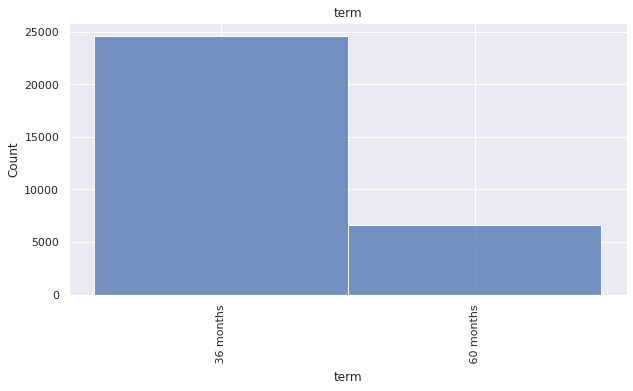

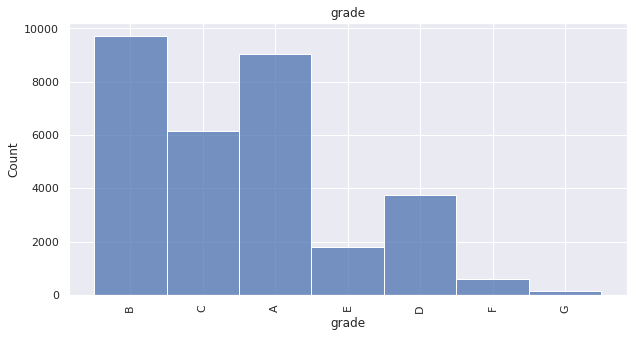

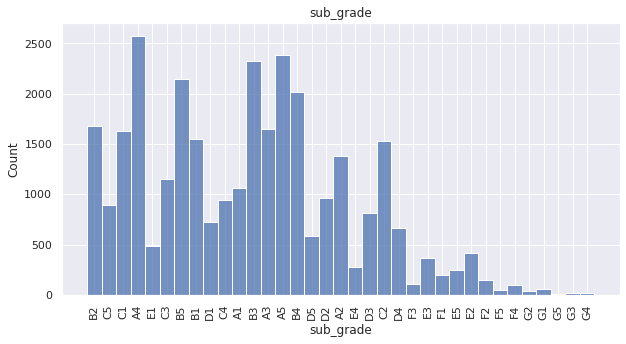

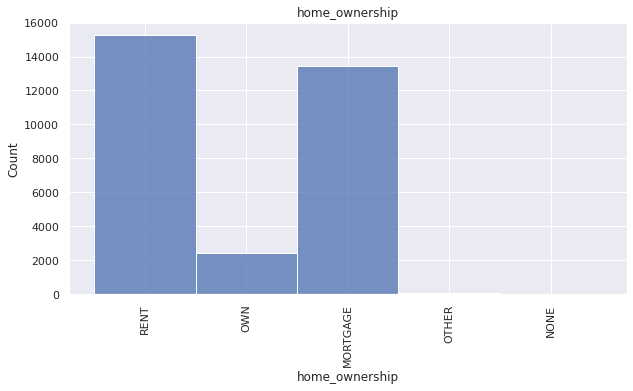

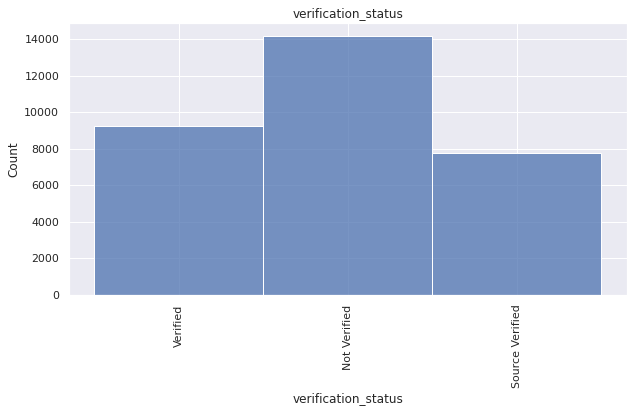

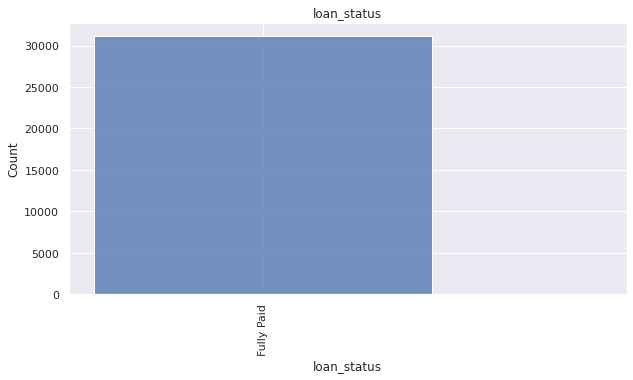

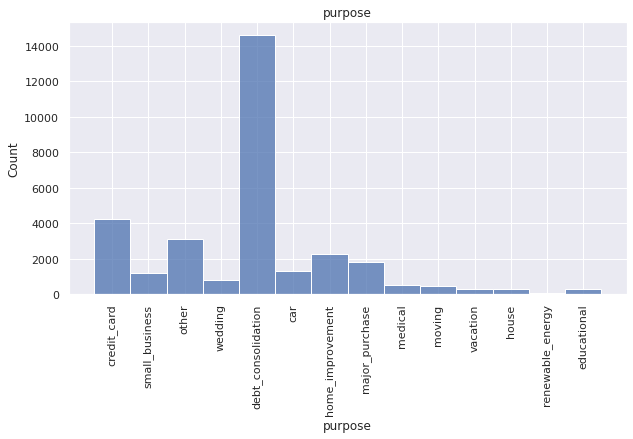

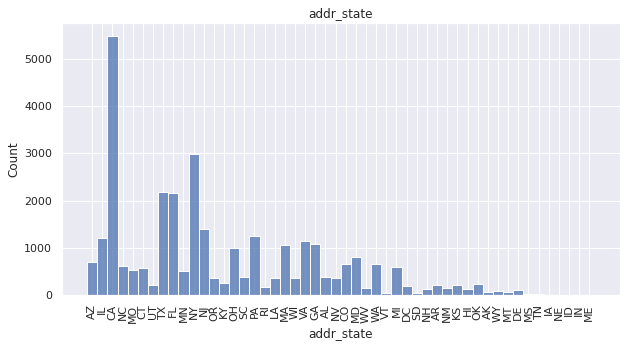

In [157]:
for col_name in cat_cols:
    sns.histplot(data = loan_df[loan_df['loan_status']=='Fully Paid'][col_name]).set_title(col_name)
    plt.xticks(rotation=90)
    plt.show()
    print("\n")

###> 36 month term has more customers in fully paid status
###> A and B grade customers fall in fully paid loan status more than the others
###> Debt consolidation is the major purpose among borrowers who paid fully
###> People from the state 'CA' have more borrowers in fully paid status

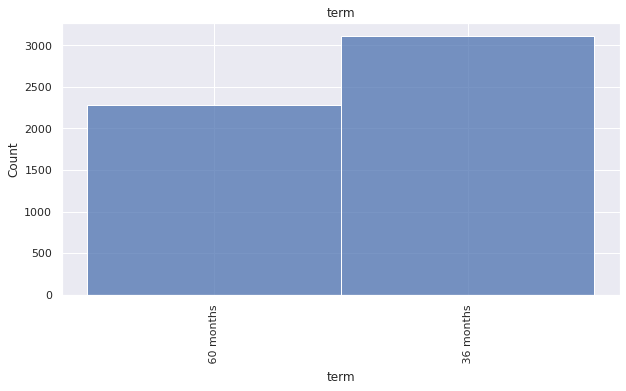

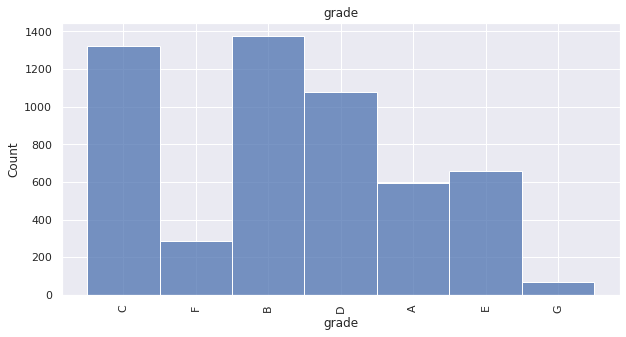

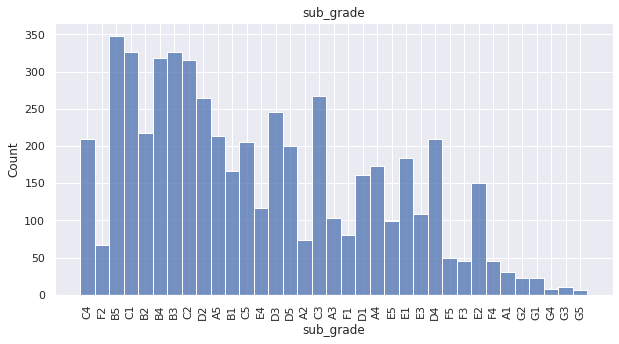

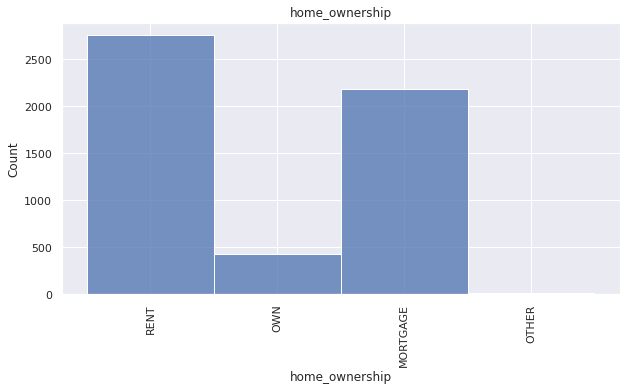

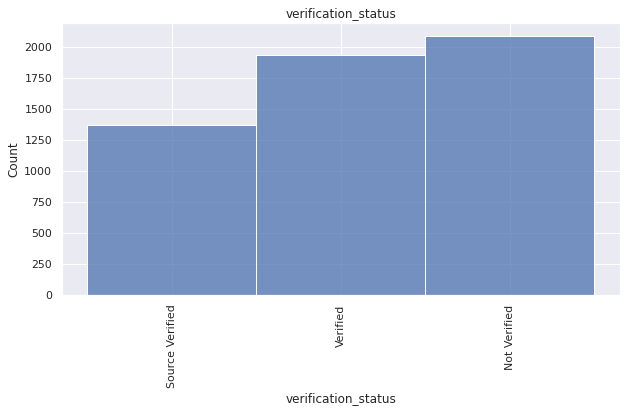

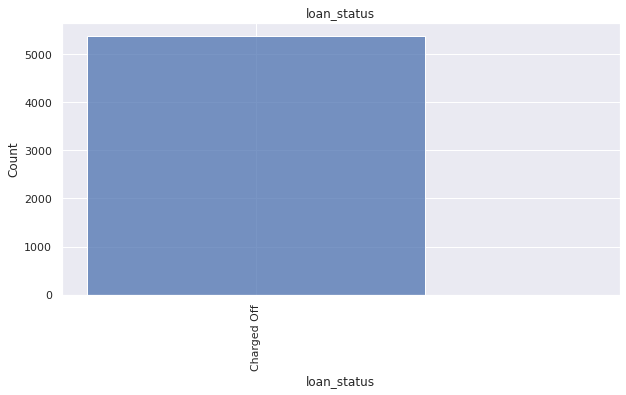

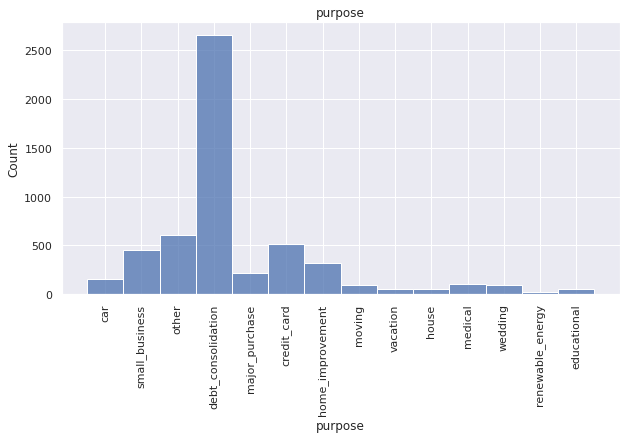

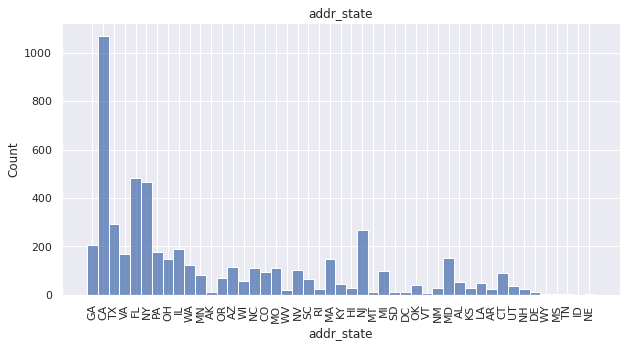

In [158]:
for col_name in cat_cols:
    sns.histplot(data = loan_df[loan_df['loan_status']=='Charged Off'][col_name]).set_title(col_name)
    plt.xticks(rotation=90)
    plt.show()
    print("\n")

###> 36 month term has more customers in charged off status but not as significant change as in the case of fully paid customers
###> B and C grade customers fall in charged off loan status more than the others
###> Debt consolidation is the major purpose among borrowers who are charged off.
###> People from the state 'CA' have more borrowers in charged off status

In [159]:
loan_df[loan_df['loan_status']=='Charged Off'].isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

In [160]:
loan_df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

### By analysing the bar plots and histogram we got a clear understanding of the features in depth, but the correrelation is yet to be identified.

###Inference after univariate analysis: We understood and treated the outliers


#Bivariate analysis

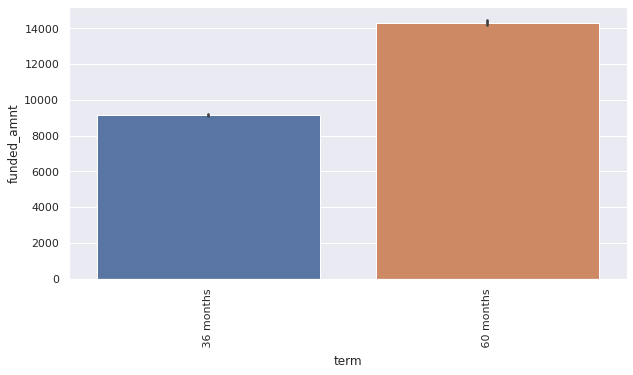

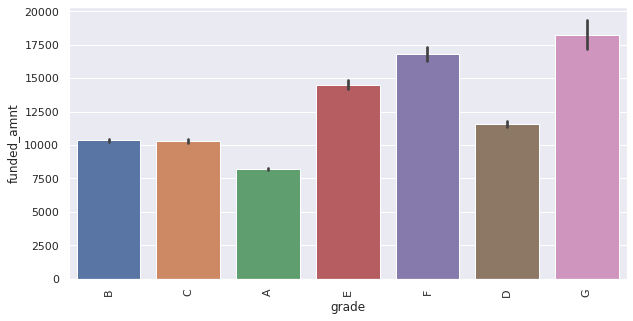

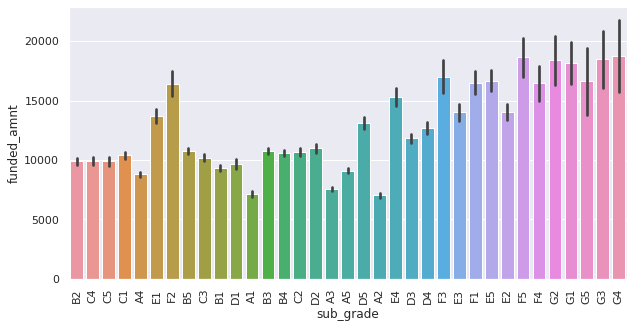

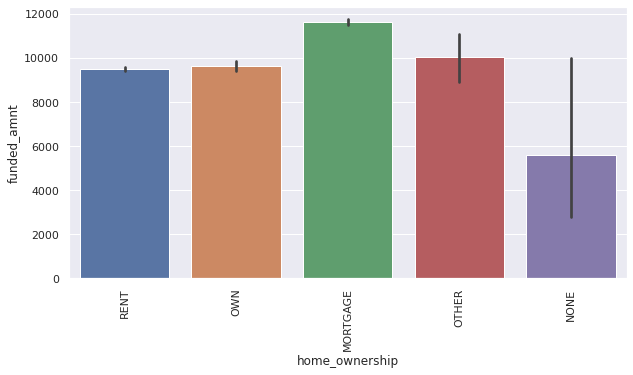

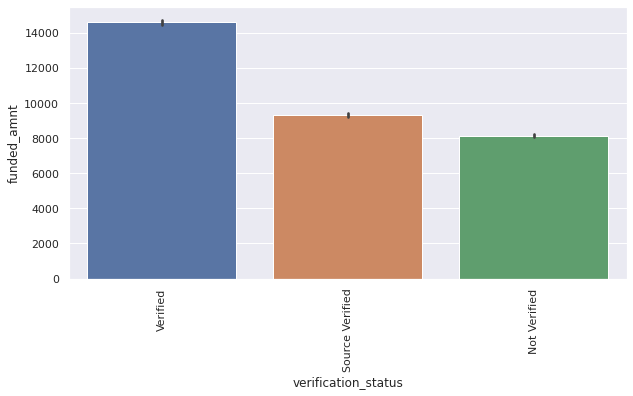

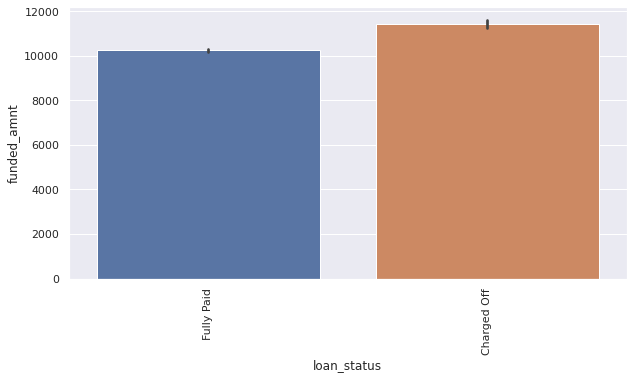

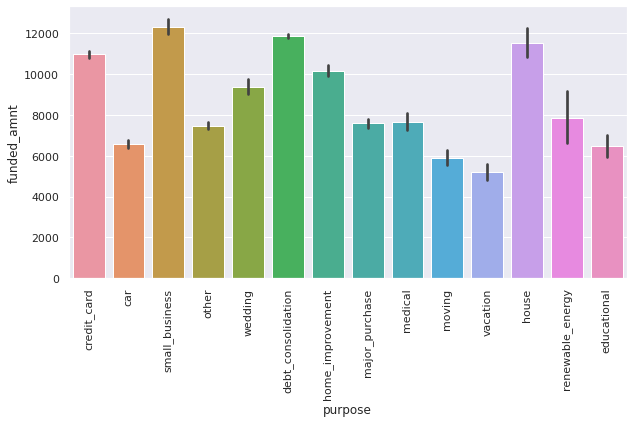

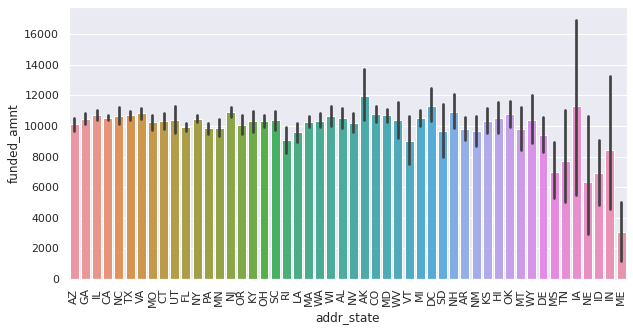

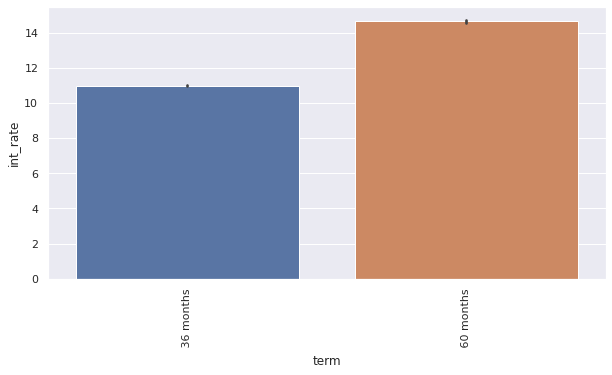

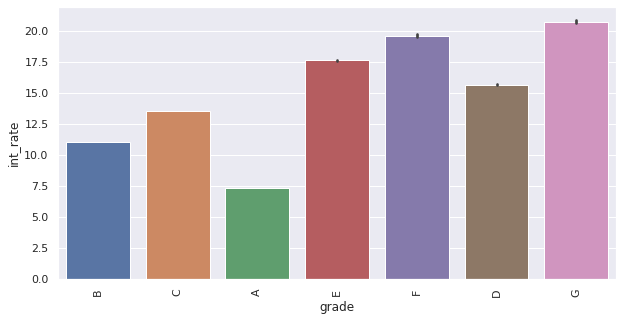

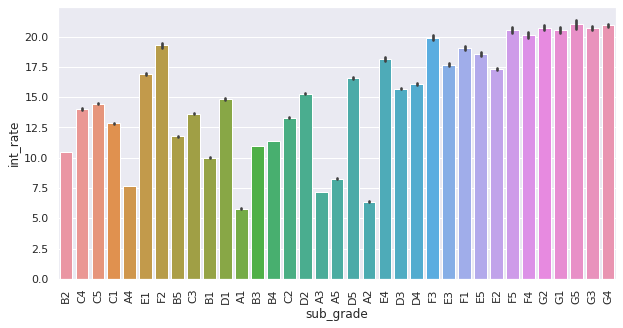

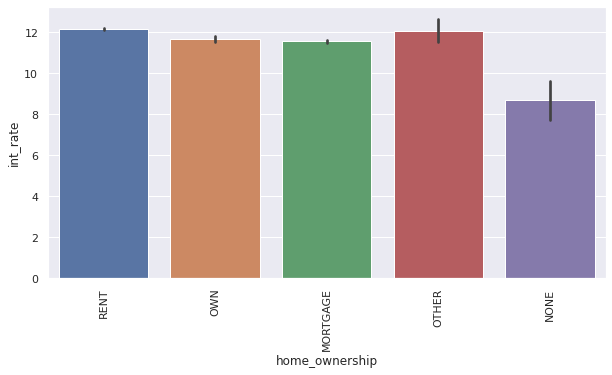

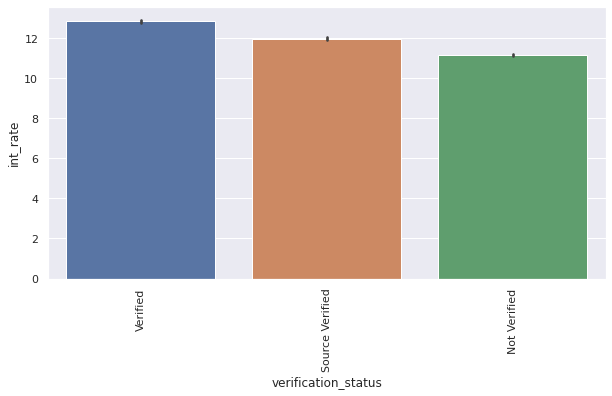

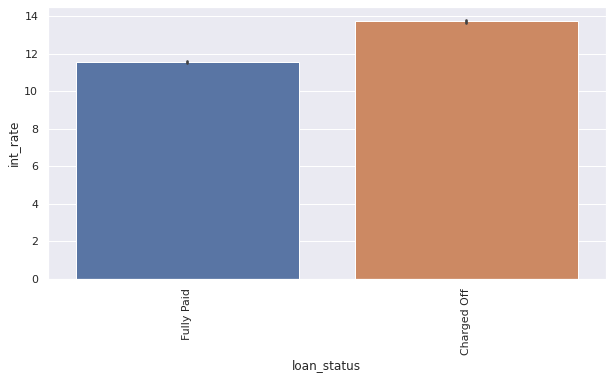

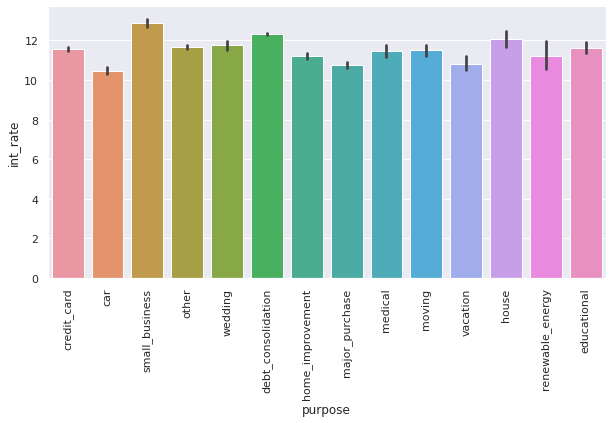

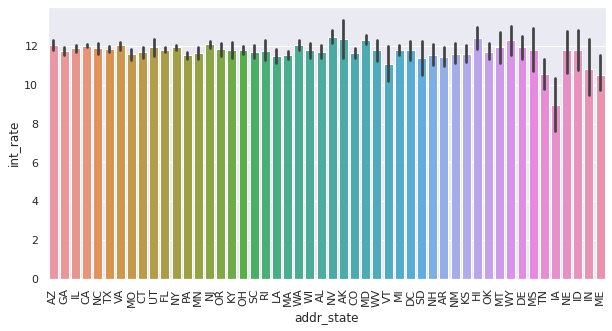

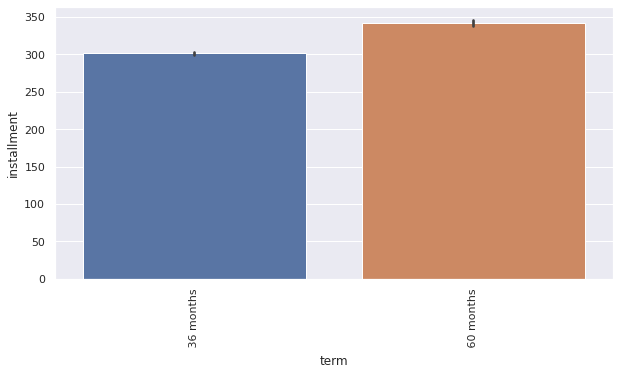

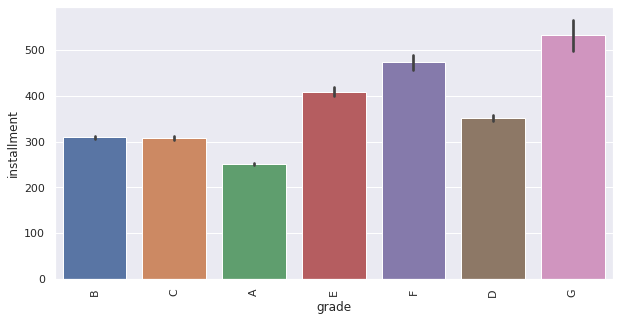

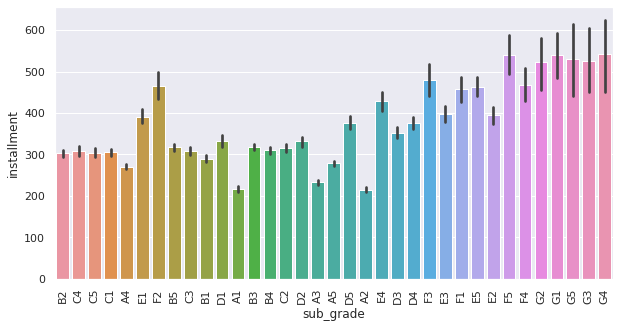

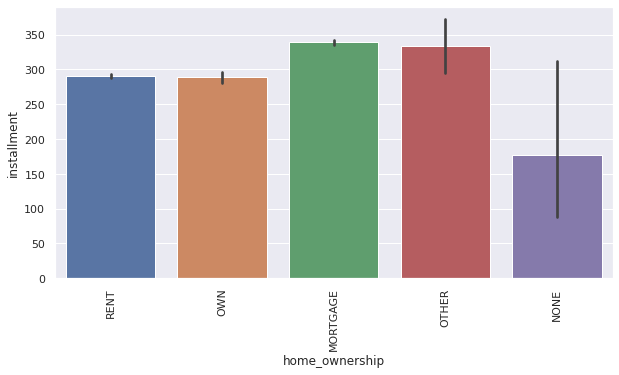

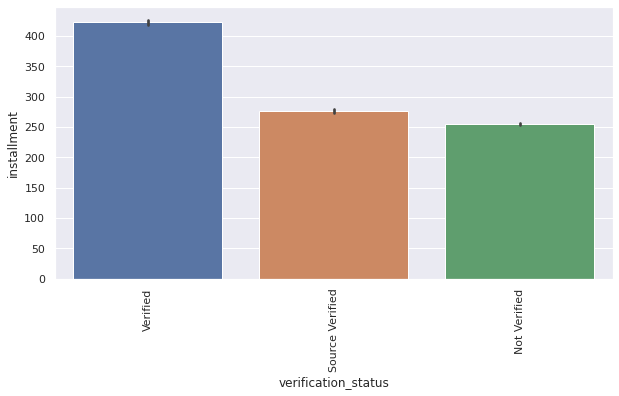

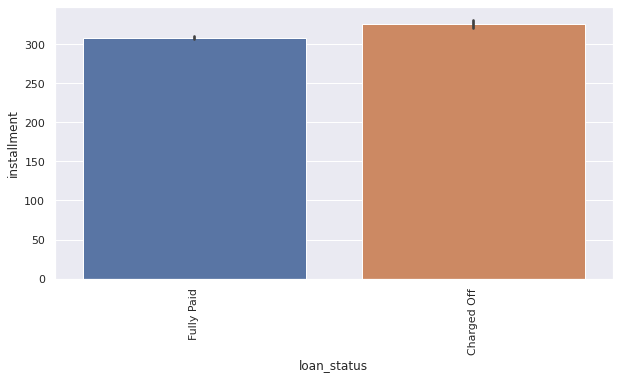

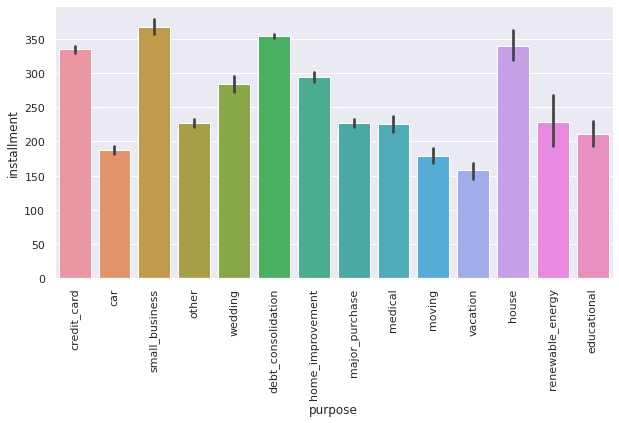

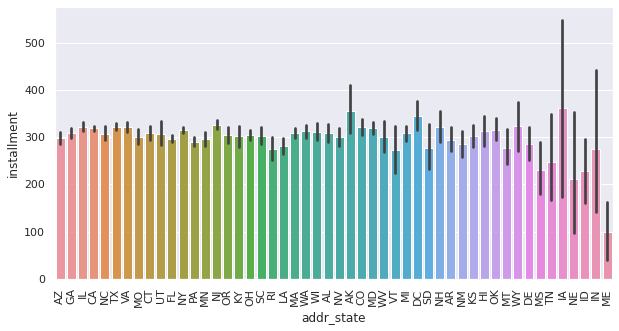

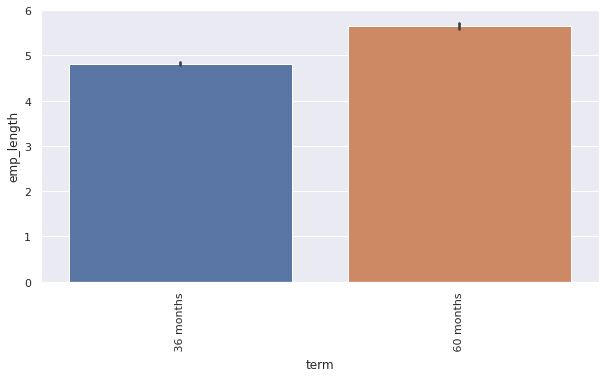

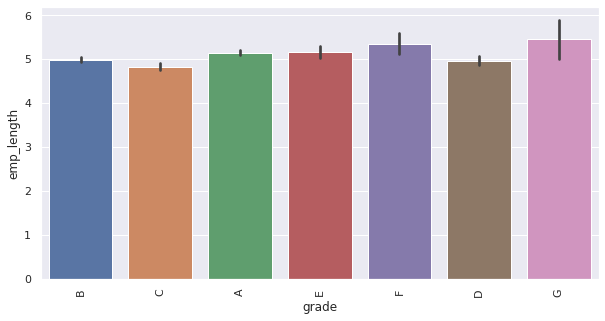

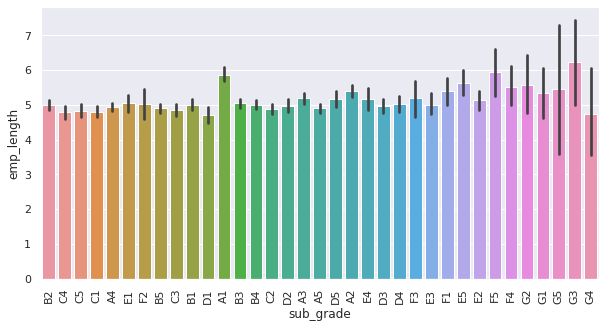

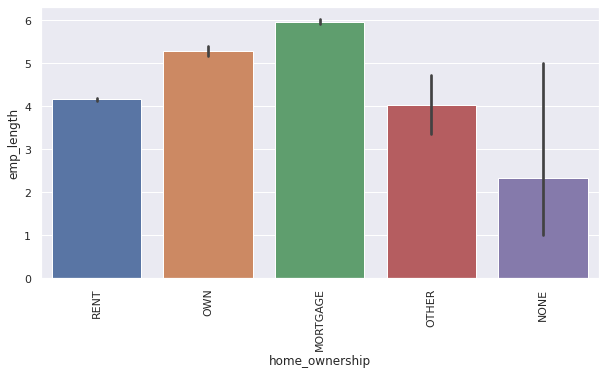

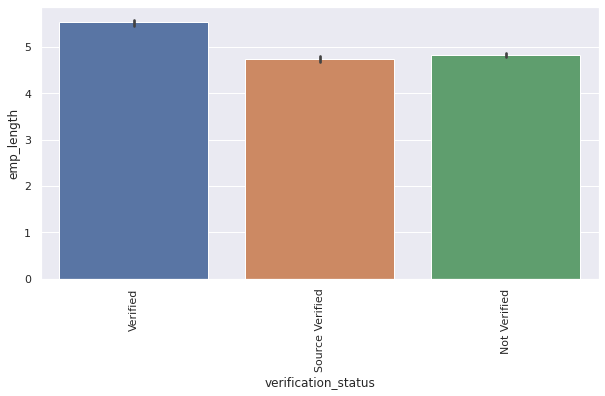

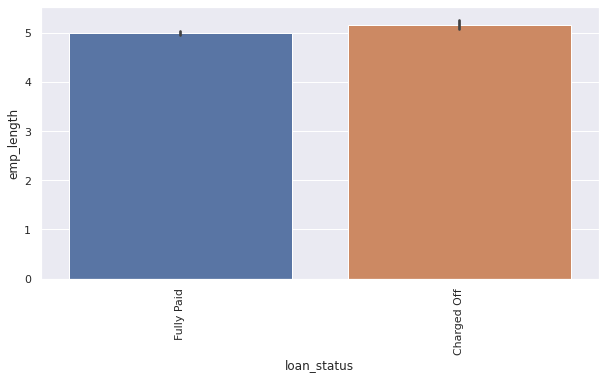

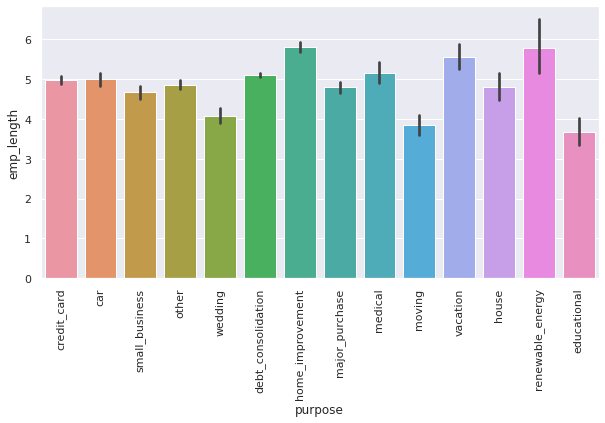

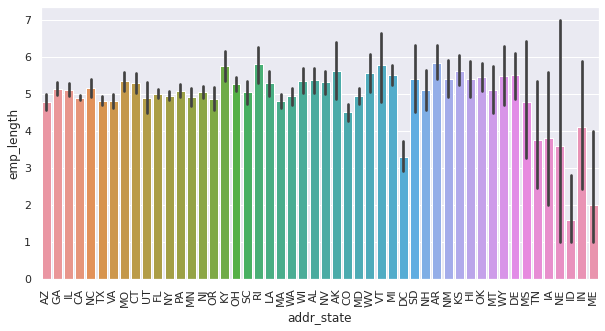

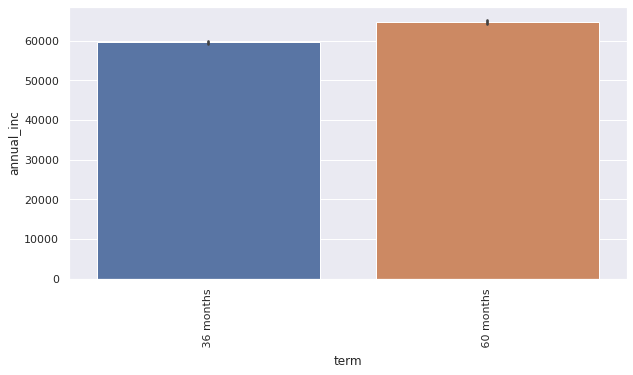

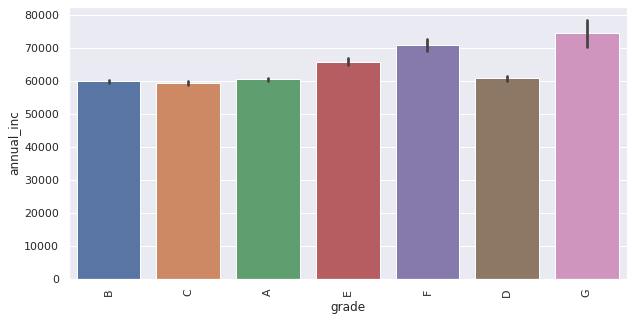

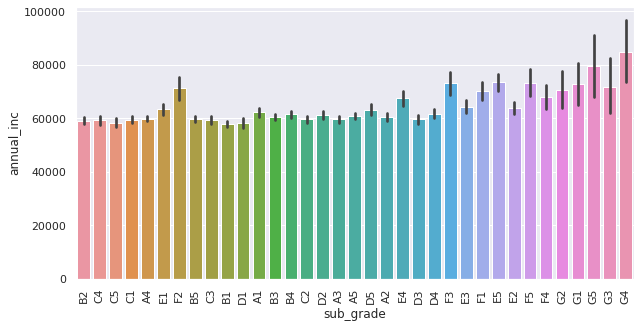

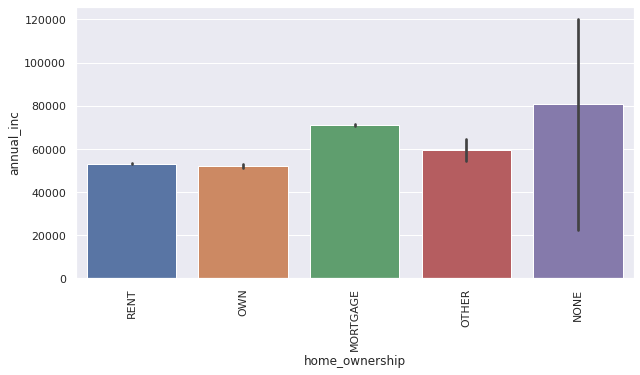

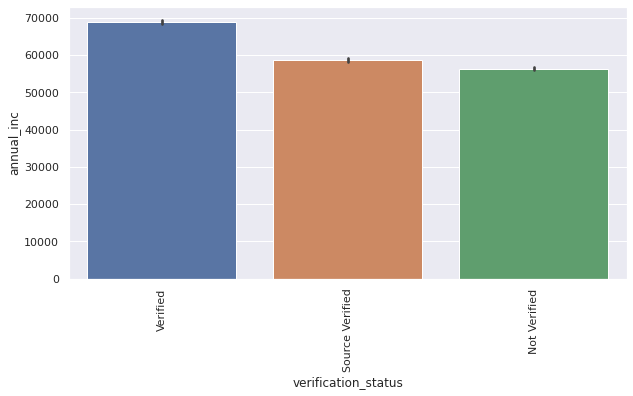

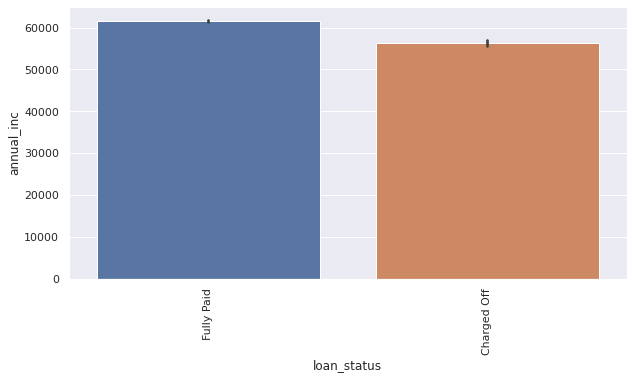

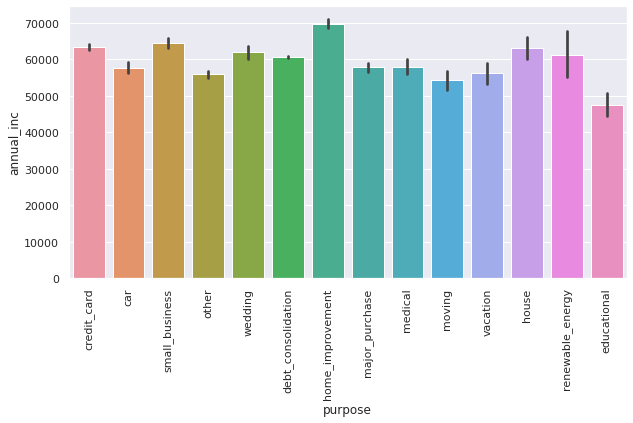

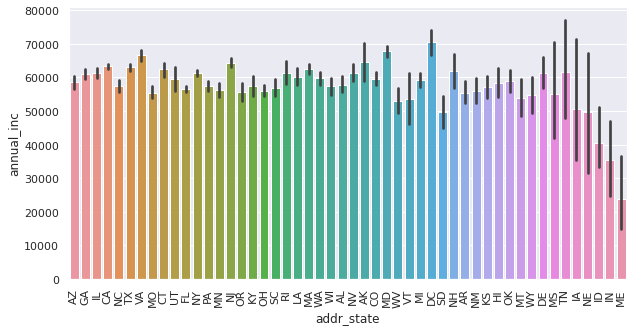

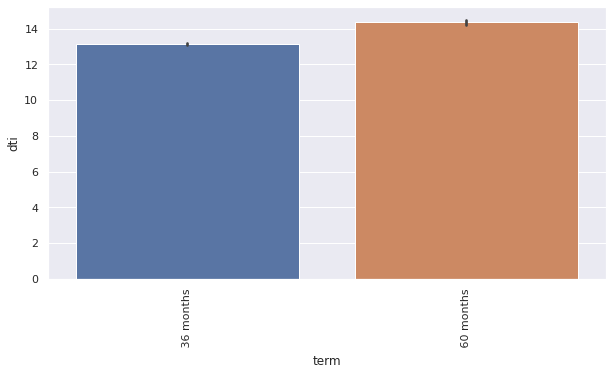

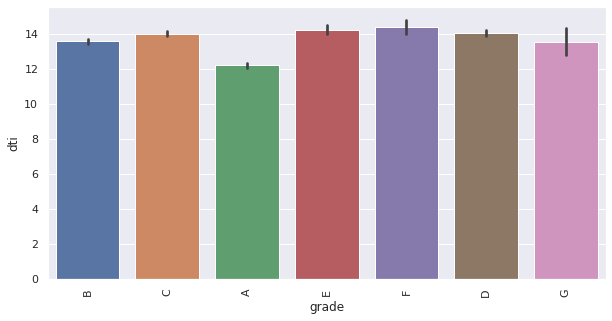

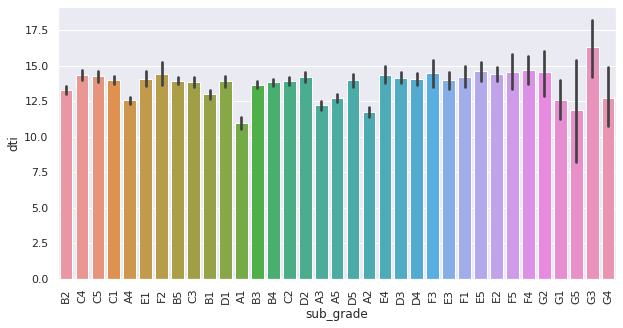

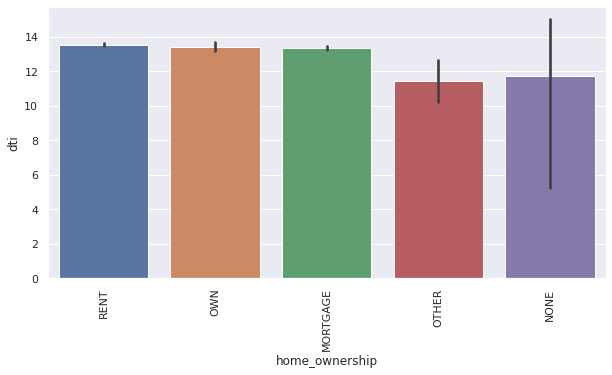

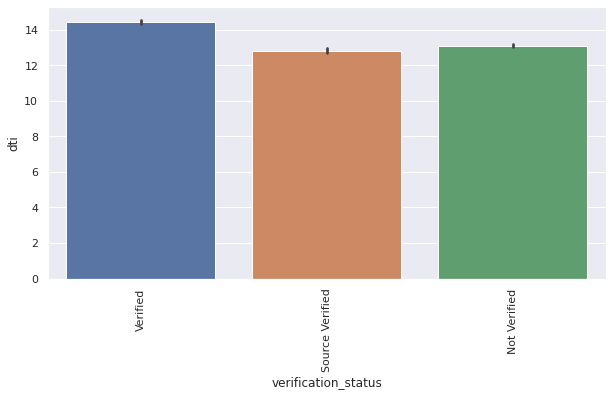

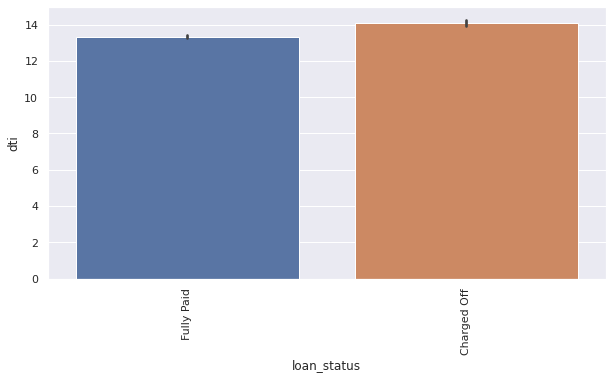

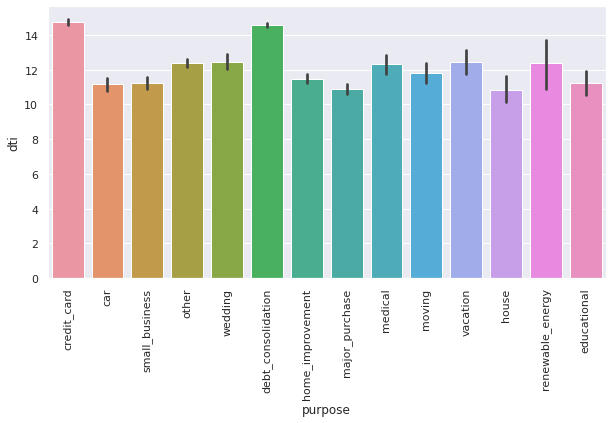

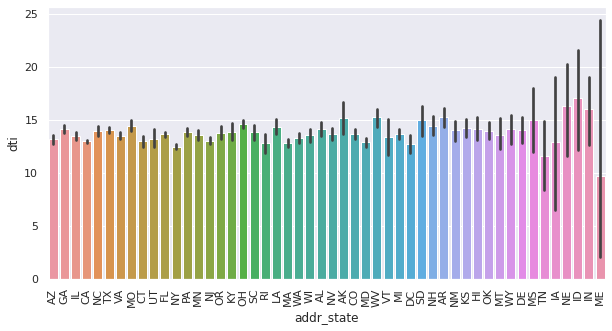

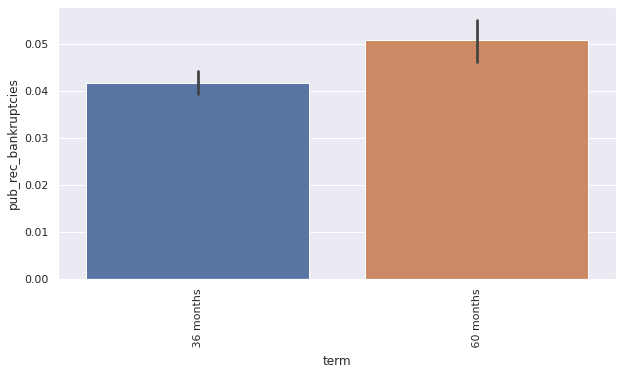

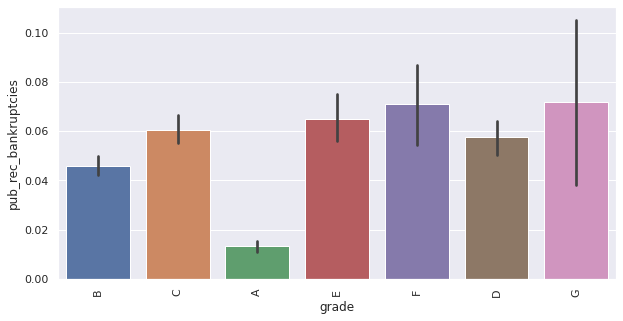

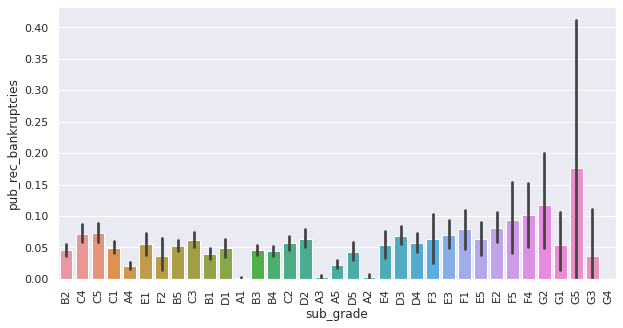

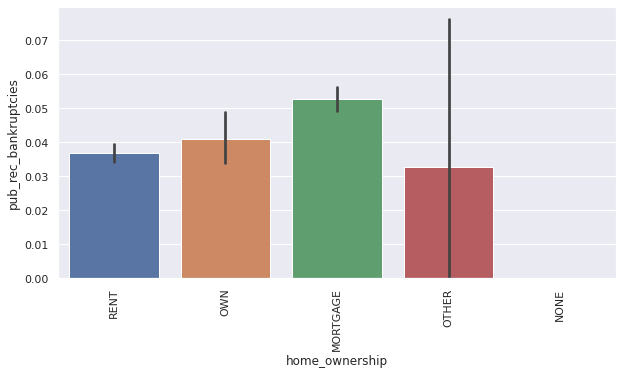

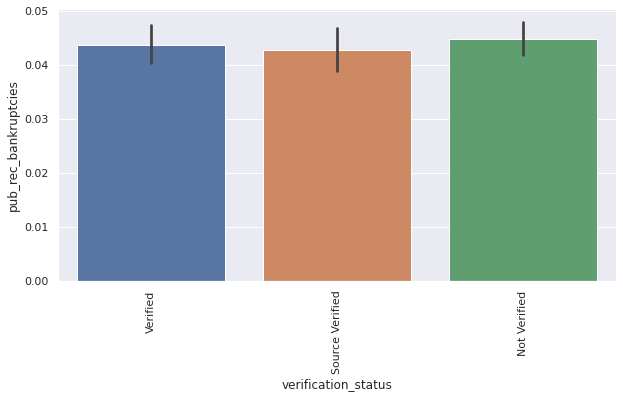

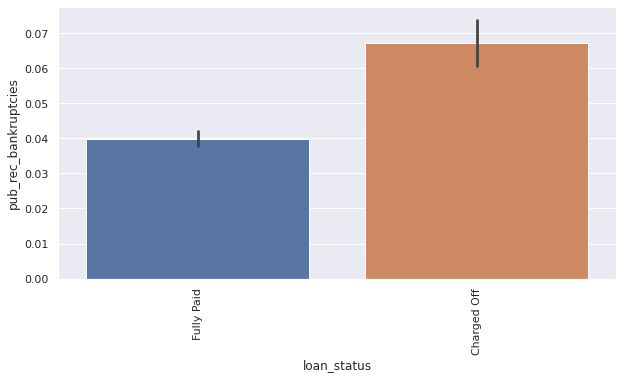

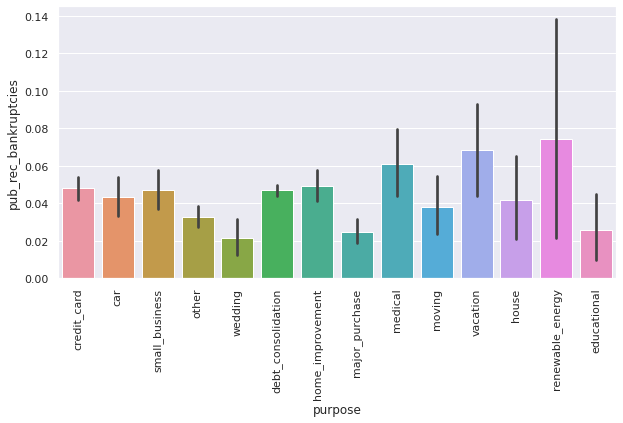

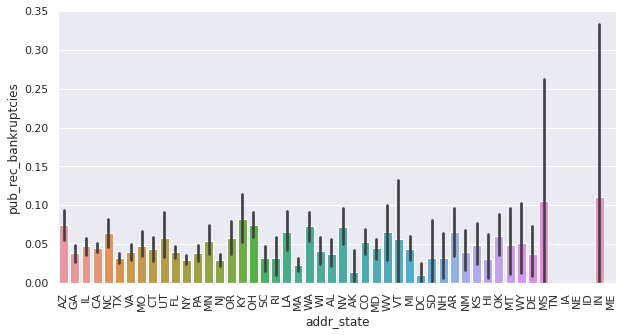

In [161]:
for col_i in num_cols:
    for col_j in cat_cols:
        sns.barplot(x=loan_df[col_j], y=loan_df[col_i])
        plt.xticks(rotation=90)
        plt.show()
        print("\n")

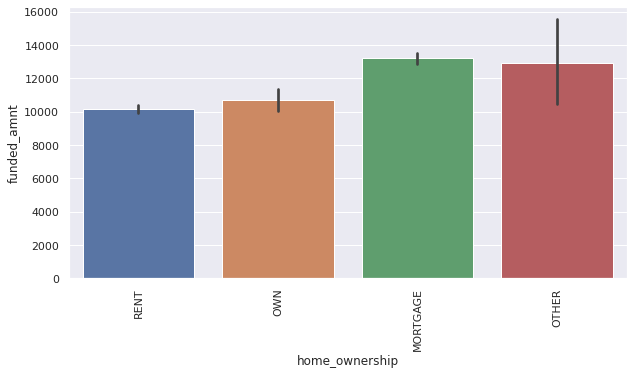

In [162]:
#Barplot of home_ownership and funded_amnt for 'Charged Off' loan_status

loan_df_Charged_Off = loan_df[(loan_df['loan_status']=='Charged Off')]
sns.barplot(x=loan_df_Charged_Off['home_ownership'], y=(loan_df_Charged_Off['funded_amnt']))
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'funded_amnt mean')

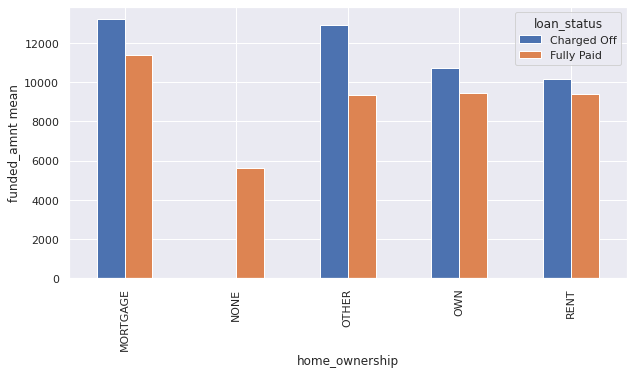

In [182]:
#Barplot to compare mean value of funded_amnt for each loan_status type grouped by home_ownership

loan_df.groupby(['home_ownership','loan_status'])['funded_amnt'].mean().unstack().plot(kind='bar').set_ylabel("funded_amnt mean")

Text(0, 0.5, 'dti mean')

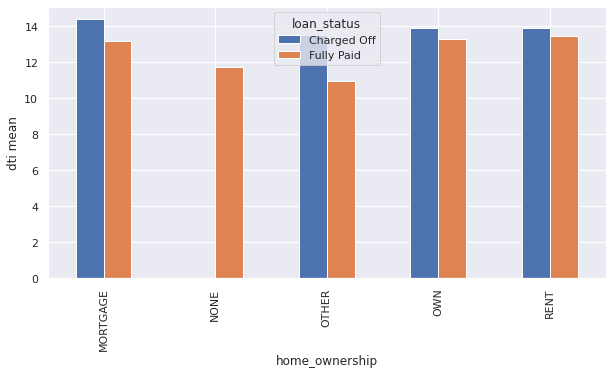

In [181]:
#Barplot to compare mean value of dti for each loan_status type grouped by home_ownership

loan_df.groupby(['home_ownership','loan_status'])['dti'].mean().unstack().plot(kind='bar').set_ylabel("dti mean")

###From the above plots we see that the mean value of funded_amnt and dti for users with 'Charged Off' loan_status is significantly higher than Fully paid customers for home_ownership type as 'mortgage'. So we can suggest to reduce the loan amount of customers with home_ownership type as 'mortgage'.

Text(0, 0.5, 'int_rate mean')

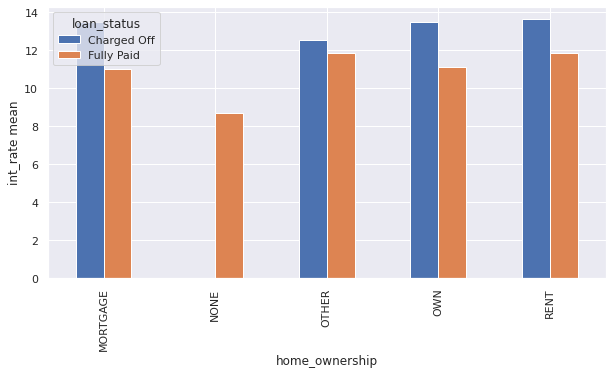

In [165]:
#Barplot to compare mean value of int_rate for each loan_status type grouped by home_ownership

loan_df.groupby(['home_ownership','loan_status'])['int_rate'].median().unstack().plot(kind='bar').set_ylabel("int_rate mean")

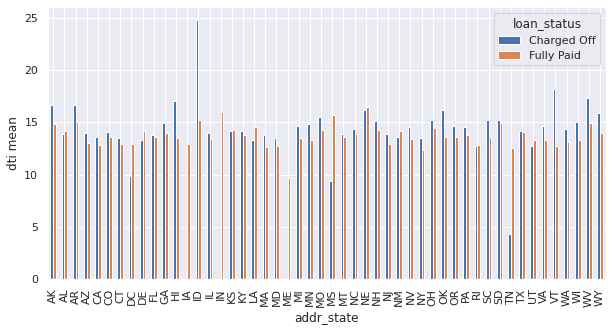

In [166]:
#Barplot to compare mean value of dti for each loan_status type grouped by addr_state

loan_df.groupby(['addr_state','loan_status'])['dti'].mean().unstack().plot(kind='bar').set_ylabel("dti mean")
plt.show()

In [167]:
loan_df[(loan_df['addr_state']=='ID')]['loan_status'].value_counts()

Fully Paid     4
Charged Off    1
Name: loan_status, dtype: int64

In [168]:
#Setting the figure size to a readable format

sns.set(rc = {'figure.figsize':(10,5)})

In [169]:
# Binning the 'emp_length' into 3 categories

loan_df['emp_length_bin'] = pd.cut(loan_df.emp_length,3)
loan_df['emp_length_bin']

0         (7.0, 10.0]
1        (0.991, 4.0]
2         (7.0, 10.0]
3         (7.0, 10.0]
4        (0.991, 4.0]
             ...     
36583      (4.0, 7.0]
36584    (0.991, 4.0]
36585    (0.991, 4.0]
36586    (0.991, 4.0]
36587    (0.991, 4.0]
Name: emp_length_bin, Length: 36588, dtype: category
Categories (3, interval[float64, right]): [(0.991, 4.0] < (4.0, 7.0] < (7.0, 10.0]]

Text(0, 0.5, 'dti mean')

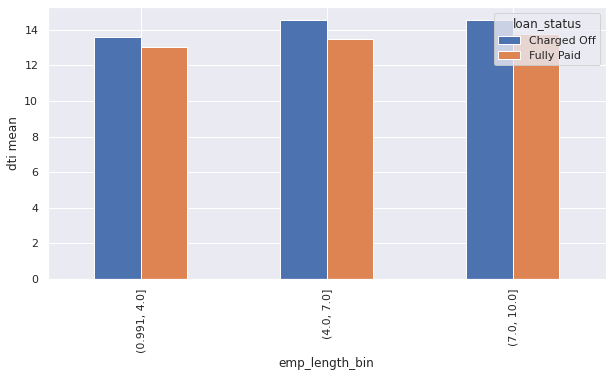

In [170]:
#Barplot to compare mean value of dti for each loan_status type grouped by emp_length_bin

loan_df.groupby(['emp_length_bin','loan_status'])['dti'].mean().unstack().plot(kind='bar').set_ylabel("dti mean")

Text(0, 0.5, 'dti mean')

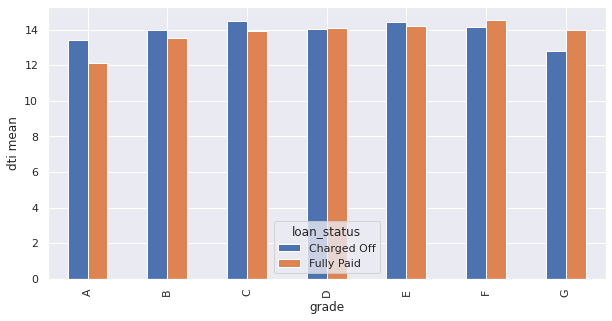

In [171]:
#Barplot to compare mean value of dti for each loan_status type grouped by grade

loan_df.groupby(['grade','loan_status'])['dti'].mean().unstack().plot(kind='bar').set_ylabel("dti mean")

Text(0, 0.5, 'funded_amnt mean')

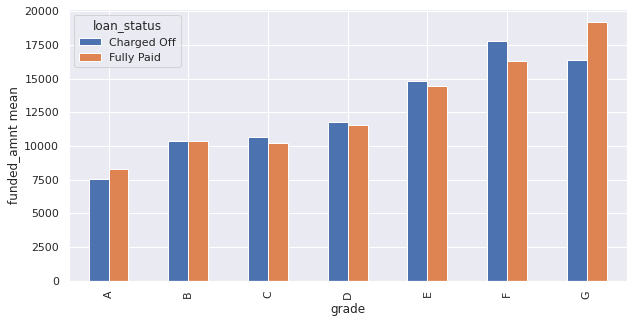

In [172]:
#Barplot to compare mean value of dti for each loan_status type grouped by grade

loan_df.groupby(['grade','loan_status'])['funded_amnt'].mean().unstack().plot(kind='bar').set_ylabel("funded_amnt mean")

Text(0, 0.5, 'int_rate mean')

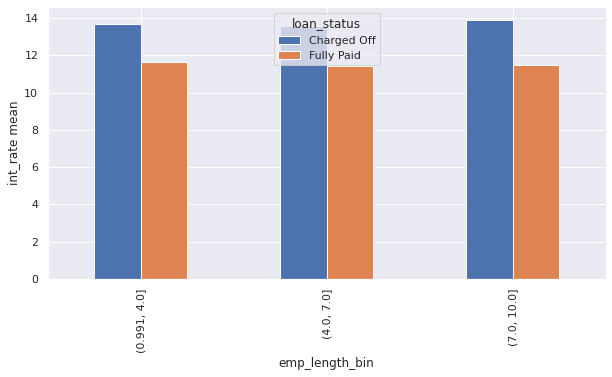

In [173]:
#Barplot to compare mean value of int_rate for each loan_status type grouped by emp_length_bin

loan_df.groupby(['emp_length_bin','loan_status'])['int_rate'].mean().unstack().plot(kind='bar').set_ylabel("int_rate mean")

Text(0, 0.5, 'int_rate mean')

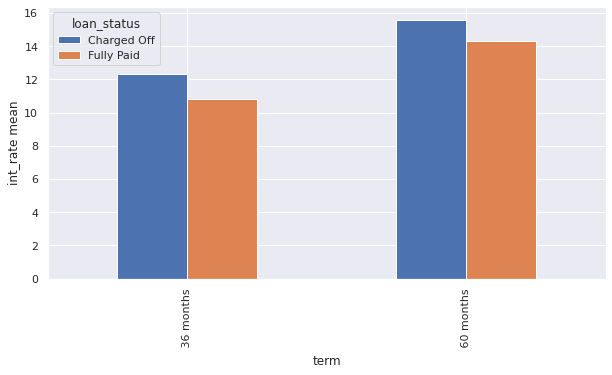

In [174]:
#Barplot to compare mean value of int_rate for each loan_status type grouped by term

loan_df.groupby(['term','loan_status'])['int_rate'].mean().unstack().plot(kind='bar').set_ylabel("int_rate mean")

Text(0, 0.5, 'dti mean')

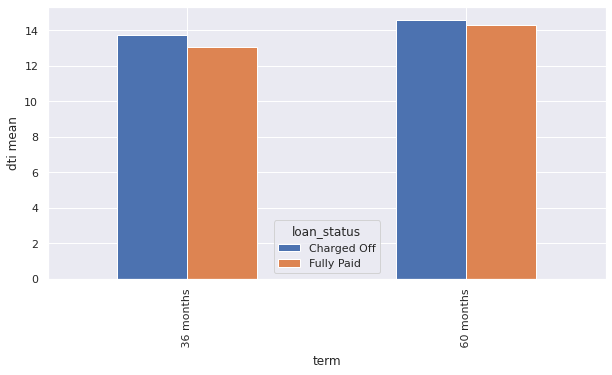

In [175]:
#Barplot to compare mean value of int_rate for each loan_status type grouped by term

loan_df.groupby(['term','loan_status'])['dti'].mean().unstack().plot(kind='bar').set_ylabel("dti mean")

Text(0, 0.5, 'dti mean')

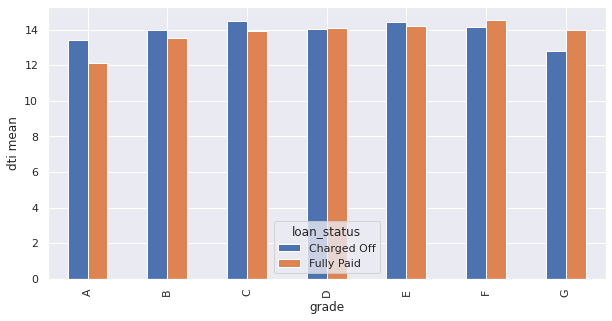

In [176]:
#Barplot to compare mean value of int_rate for each loan_status type grouped by term

loan_df.groupby(['grade','loan_status'])['dti'].mean().unstack().plot(kind='bar').set_ylabel("dti mean")

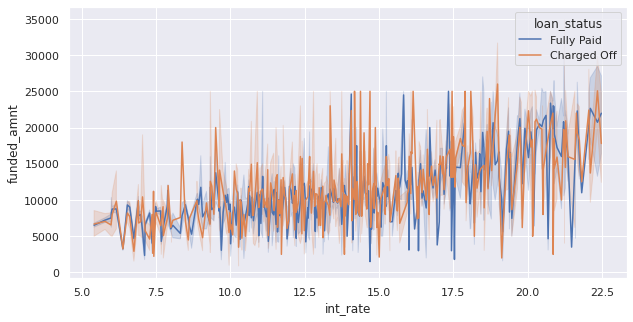

In [177]:
# Line plot for 'int_rate' and 'funded_amnt' for each type of loan status

sns.lineplot(data = loan_df, x = 'int_rate', y = 'funded_amnt', hue = 'loan_status')
plt.show()

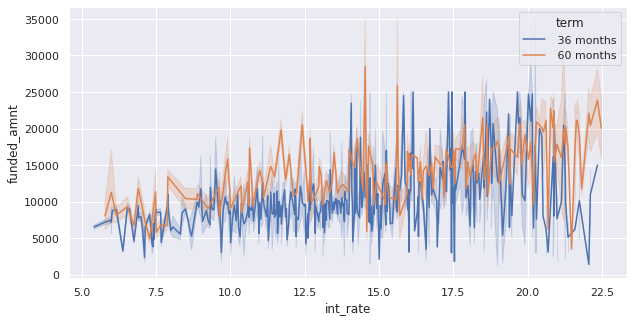

In [178]:
# Line plot for 'int_rate' and 'funded_amnt' for each type of 'term'

sns.lineplot(data = loan_df, x = 'int_rate', y = 'funded_amnt', hue = 'term')
plt.show()

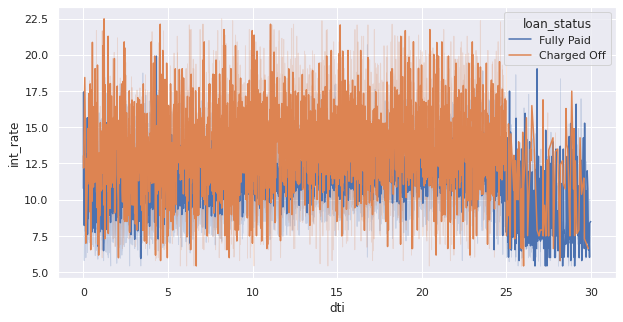

In [179]:
# Line plot for 'dti' and 'int_rate' for each type of 'loan_status'

sns.lineplot(data = loan_df, x = 'dti', y = 'int_rate', hue = 'loan_status')
plt.show()

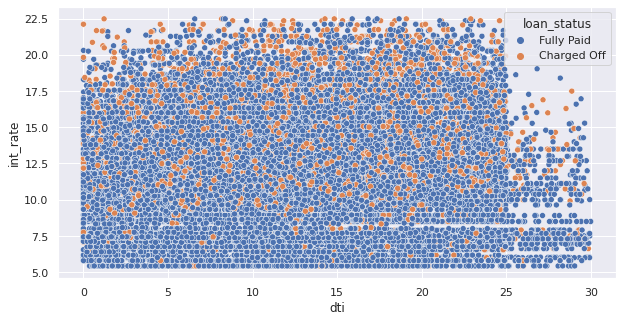

In [180]:
# scatterplot plot for 'dti' and 'int_rate' for each type of 'loan_status'

sns.scatterplot(data = loan_df, x = 'dti', y = 'int_rate', hue = 'loan_status')
plt.show()

###The lineplots could not provice any visible results in the analysis

### Inference after bivariate analysis: From the above plots we see that the mean value of funded_amnt and dti for users with 'Charged Off' loan_status is significantly higher than Fully paid customers for home_ownership type as 'mortgage'. So we can suggest to reduce the loan amount of customers with home_ownership type as 'mortgage'.


#5. Coclusion

###1. The data is highly imbalance. The data for 'Fully paid' users is significantly higher than those with the loan_status 'Charged Off'.
###2. For the mean values for funded amount and dti is comparatively higher to the Charged off users than the fully paid users.
###3. From the above plots we see that the mean value of funded_amnt and dti for users with 'Charged Off' loan_status is significantly higher than Fully paid customers for home_ownership type as 'mortgage'. So we can suggest to reduce the loan amount of customers with home_ownership type as 'mortgage'.
###4. Reduce the funded amnt for users with homeonwership as mortgage
###5. Better to deny loan if dti is high